In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: Dana Ines Romero Bustos

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [ ]:
centrada = lambda f , x , h: (f(x + h) - f(x - h)) / (2 * h)


def derivada(f , x , tol = 1e-8 , max_iter = 1000):
  '''
  f: Función a derivar (evaluable)
  x: En que valor se reriva
  tol: tolerancia (float)
  max_iter: numero de iteraciones (int)
  '''
  h = 0.1
  h_valores = [0.1]

  for i in max_iter:
    valor_derivada = centrada(f, x , h)


  return valor_derivada, h_valores

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



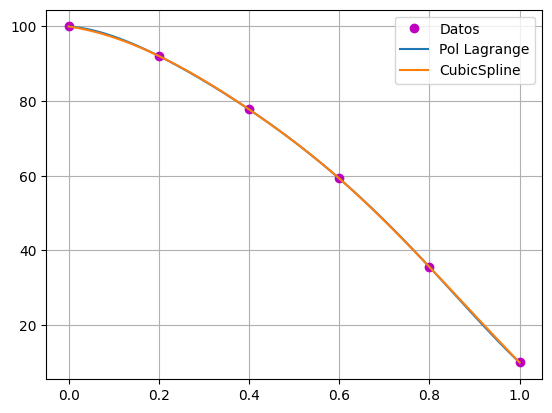

In [24]:
# Datos
x1 = [0.0 , 0.2 , 0.4 , 0.6 , 0.8 , 1.0]
T = [100.0 , 92.1 , 77.8 , 59.3 , 35.6 ,10.0]

# Incisos a y b:

# Polinomio de lagrange
pol_lagrange = lagrange(x1 , T)

# Interpolacion con CubicSpline
pol_CubicSpline = CubicSpline(x1 , T)

# Interpolar

x_inter = np.linspace(0.0 , 1.0 , 100)

T_inter_lagrange = pol_lagrange(x_inter)
T_inter_Cubic = pol_CubicSpline(x_inter)

# Grafico
plt.plot(x1 , T , 'mo' , label = 'Datos')
plt.plot(x_inter , T_inter_lagrange , label = 'Pol Lagrange')
plt.plot(x_inter , T_inter_Cubic , label = 'CubicSpline')

plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Inciso c:
h = 1e-4

#Calculo del gradiente termico
dT = np.gradient(pol_CubicSpline(x1) , h)

print(f'Gradiente Termico: {dT}')

Gradiente Termico: [ -79000. -111000. -164000. -211000. -246500. -256000.]


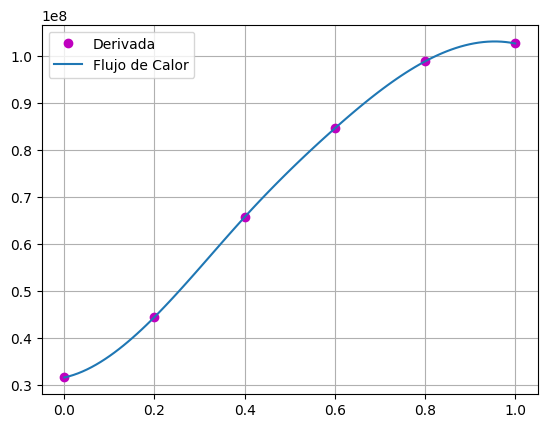

In [33]:
# Inciso d:
k = 401 # W / m*K

# Vamos a interpolar los datos que obtuvumos en el inciso anterior
polinomio_CubicSpline = CubicSpline(x1 , dT)

# Grafico

# Como CubicSpline nos da un plinomio, una ves teniendolo lo multiplicamos por  la constante -k y asi obtenemos la funcion del flujo de calor
plt.plot(x1 , -k * dT , 'mo' , label = 'Derivada')
plt.plot(x_inter , -k * polinomio_CubicSpline(x_inter) , label = 'Flujo de Calor')

plt.legend()
plt.grid(True)
plt.show()

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [34]:
# Inciso a:

# Funcion a integrar para encontrar la masa m
f = lambda y , x : y * x  # kg/m^2

# Calculando la integral con quad

def intergral_interna(x):
  integrando = lambda y : y*x
  resultado , _ = quad(integrando , 0 , 3 - x)
  return resultado

m_quad , error_quad = quad(intergral_interna , 0 , 3)

# Calculando la integral con dblquad
m_dblquad , error_dblquad = dblquad(f , 0 , 3 ,
        lambda x : 0 , lambda x : 3 - x)

print(f'Integral con quad: {m_quad} \nError con quad: {error_quad}')
print(f'Integral con dblquad: {m_dblquad} \nError con dbl quad: {error_dblquad}')

Integral con quad: 3.375000000000001 
Error con quad: 3.7470027081099046e-14
Integral con dblquad: 3.375000000000001 
Error con dbl quad: 3.7470027081099046e-14


In [11]:
# Inciso b:

# Funcion a integral para encontrar My
funcion_My = lambda y , x: y * x**2

My, error_My =dblquad(funcion_My , 0 , 3 ,
                            lambda x : 0 , lambda x : 3 - x)

# Funcion a integrar para encontrar Mx
funcion_Mx = lambda y , x : x * y**2

Mx, error_Mx =dblquad(funcion_Mx , 0 , 3 ,
                            lambda x : 0 , lambda x : 3 - x)

# Coordenadas del centro de masa

x_barra = My / m_dblquad
y_barra = Mx / m_dblquad

print(f'Centro de masa: ({x_barra} , {y_barra})')

Centro de masa: (1.1999999999999997 , 1.1999999999999997)


In [12]:
# Inciso c

# Funcion a integrar para encontrar el momento de inercia
f_Ix = lambda y , x : y**3 * x

# Integrando para encontraar Ix
Ix , error_Ix = dblquad(f_Ix , 0 , 3 ,
                        lambda x : 0 , lambda x : 3 - x)

print(f'Ix = {Ix}')

Ix = 6.074999999999999
